In [21]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a toy data set with 100 samples and 1000 features
n_samples = 200
n_features = 1000
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise= 1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set and calculate R^2
y_train_pred = model.predict(X_train)
print(f'Training R^2: {r2_score(y_train, y_train_pred)}')

# Predict on the testing set and calculate R^2
y_test_pred = model.predict(X_test)
print(f'Test R^2: {r2_score(y_test, y_test_pred)}')


Training R^2: 1.0
Test R^2: 0.20872410431565258


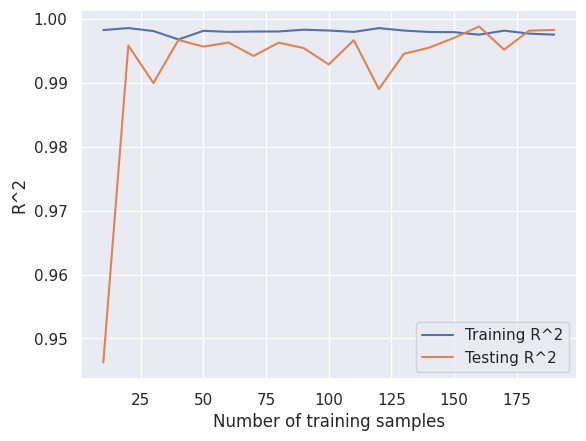

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


# Create empty lists to store R^2 values
train_r2 = []
test_r2 = []


# Iterate over different amounts of training data
for i in range(10, n_samples, 10):

    # Split the data into training and testing sets
    
    X_train, X_test, y_train, y_test = train_test_split(X[:i], y[:i], test_size=0.2)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the training set and calculate R^2
    y_train_pred = model.predict(X_train)
    train_r2.append(r2_score(y_train, y_train_pred))

    # Predict on the testing set and calculate R^2
    y_test_pred = model.predict(X_test)
    test_r2.append(r2_score(y_test, y_test_pred))


# Ensure your data is 1-D by reshaping it
train_r2_np = np.array(train_r2).flatten()
test_r2_np = np.array(test_r2).flatten()

# Generate x values
x_values = np.array(range(10, n_samples, 10)).flatten()

# Visualize R^2 values
sns.lineplot(x = x_values, y = train_r2_np, label='Training R^2')
sns.lineplot(x = x_values, y = test_r2_np, label='Testing R^2')
# plt.plot(range(10, n_samples, 10), train_r2, label='Training R^2')
# plt.plot(range(10, n_samples, 10), test_r2, label='Testing R^2')
plt.xlabel('Number of training samples')
plt.ylabel('R^2')
plt.legend()
plt.show()


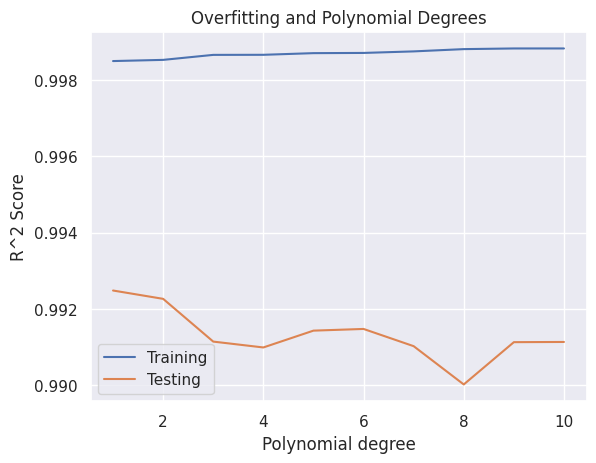

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Create a dataset with just a single input feature
X, y = make_regression(n_samples=50, n_features=1, noise= 2, random_state=50)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create arrays to store R^2 scores
train_scores = []
test_scores = []

# Try polynomial degrees from 1 to 10
degrees = list(range(1, 11))

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

import numpy as np

# Convert lists to numpy arrays before plotting
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)
degrees = np.array(degrees)

import matplotlib.pyplot as plt

plt.plot(degrees, train_scores, label='Training')
plt.plot(degrees, test_scores, label='Testing')
plt.xlabel('Polynomial degree')
plt.ylabel('R^2 Score')
plt.title('Overfitting and Polynomial Degrees')
plt.legend()
plt.show()



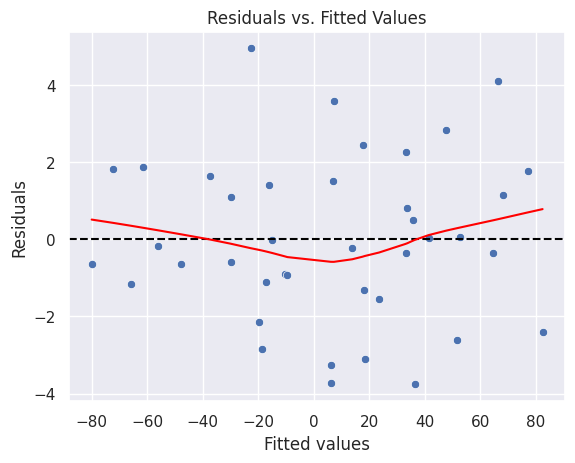

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess

# Fit a model and calculate residuals
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
residuals = y_train - y_pred

# Create a residuals vs. fitted values plot
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='black', linestyle='--')
# Add lowess line
lowess_line = lowess(residuals, y_pred)
plt.plot(lowess_line[:, 0], lowess_line[:, 1], color='red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

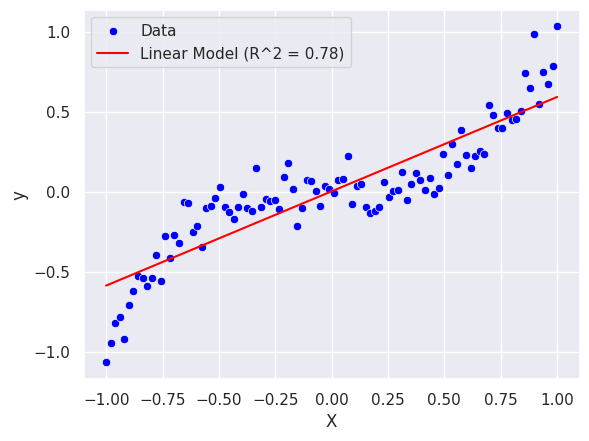

In [33]:
# Create a nonlinear dataset
X = np.array(np.linspace(-1, 1, 100))[:, np.newaxis]
X = np.array(X)
y = X**3 + np.random.normal(scale=0.1, size=X.shape)

# Fit a linear model to the data
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Plot the data and the model's prediction
sns.scatterplot(x=X.squeeze(), y=y.squeeze(), color='blue', label='Data')
sns.lineplot(x=X.squeeze(), y=y_pred.squeeze(), color='red', label=f'Linear Model (R^2 = {r2:.2f})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


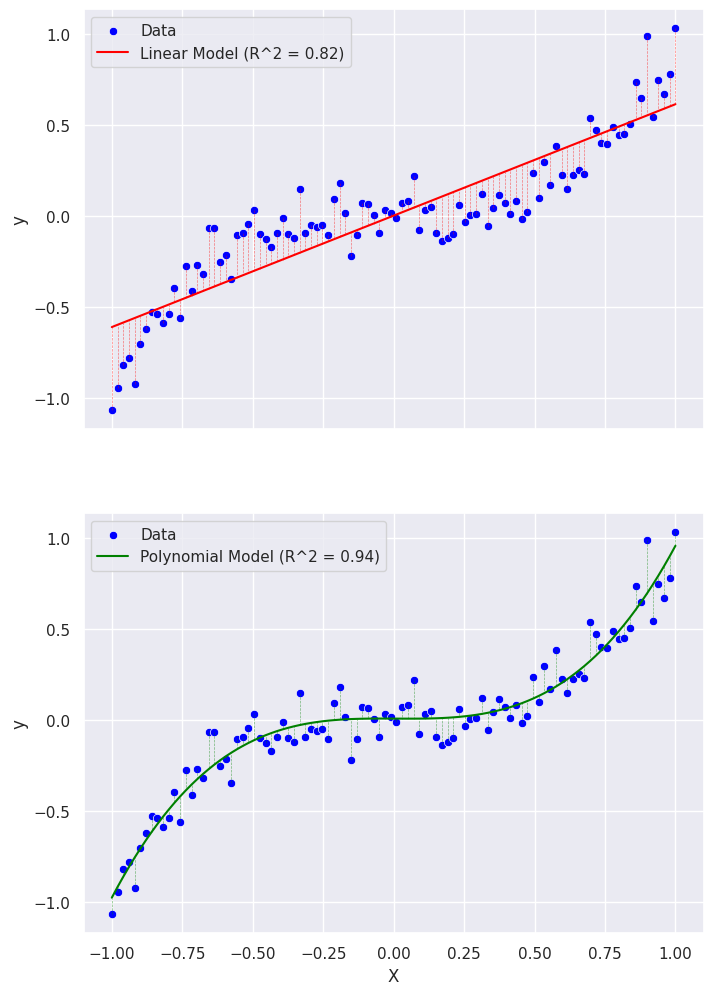

In [34]:


# Fit a non-linear model to the data
model_poly = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model_poly.fit(X, y)
y_pred_poly = model_poly.predict(X)
r2_poly = r2_score(y, y_pred_poly)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8, 12))

# Plot the data and the linear model's prediction
sns.scatterplot(x=X.squeeze(), y=y.squeeze(), color='blue', label='Data', ax=ax[0])
sns.lineplot(x=X.squeeze(), y=y_pred_linear.squeeze(), color='red', label=f'Linear Model (R^2 = {r2_linear:.2f})', ax=ax[0])
# Add lines between the actual points and the predicted points of the linear model
for x_i, y_i, y_pred_linear_i in zip(X.squeeze(), y.squeeze(), y_pred_linear.squeeze()):
    ax[0].plot([x_i, x_i], [y_i, y_pred_linear_i], color='red', linestyle='--', linewidth=0.5, alpha=0.5)
ax[0].set_ylabel('y')
ax[0].legend()

# Plot the data and the polynomial model's prediction
sns.scatterplot(x=X.squeeze(), y=y.squeeze(), color='blue', label='Data', ax=ax[1])
sns.lineplot(x=X.squeeze(), y=y_pred_poly.squeeze(), color='green', label=f'Polynomial Model (R^2 = {r2_poly:.2f})', ax=ax[1])
# Add lines between the actual points and the predicted points of the polynomial model
for x_i, y_i, y_pred_poly_i in zip(X.squeeze(), y.squeeze(), y_pred_poly.squeeze()):
    ax[1].plot([x_i, x_i], [y_i, y_pred_poly_i], color='green', linestyle='--', linewidth=0.5, alpha=0.5)
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].legend()

plt.show()


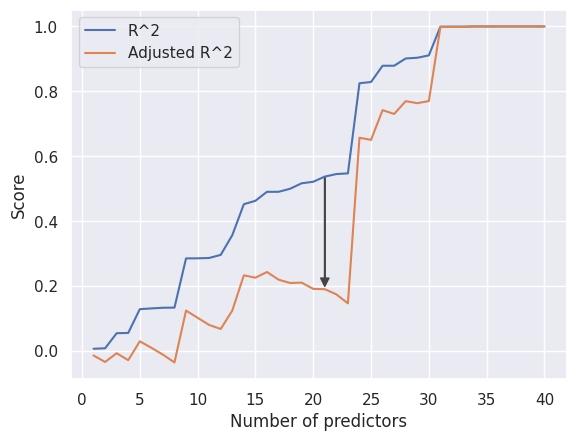

In [66]:
import numpy as np

# Create a dataset with a small number of samples and a large number of predictors
X, y = make_regression(n_samples=50, n_features=40, noise=.01, random_state=42)

# Create arrays to store R^2 and adjusted R^2 scores
r2_scores = []
adj_r2_scores = []

# Fit models with an increasing number of predictors
for p in range(1, X.shape[1] + 1):
    model = LinearRegression()
    model.fit(X[:, :p], y)
    y_pred = model.predict(X[:, :p])

    r2 = r2_score(y, y_pred)
    adj_r2 = adjusted_r2(r2, X.shape[0], p)

    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)

# Calculate the differences and find the index of the maximum difference
diffs = np.array(r2_scores) - np.array(adj_r2_scores)
max_diff_index = np.argmax(diffs)

# Plot R^2 and adjusted R^2 as a function of the number of predictors
sns.lineplot(x=range(1, X.shape[1] + 1), y=r2_scores, label='R^2')
sns.lineplot(x=range(1, X.shape[1] + 1), y=adj_r2_scores, label='Adjusted R^2')

# Add arrow patch at the location of the maximum difference
plt.gca().add_patch(patches.FancyArrowPatch(
    (max_diff_index - 1, r2_scores[max_diff_index-1]), (max_diff_index - 1, adj_r2_scores[max_diff_index-2]),
    connectionstyle="arc3,rad=0",
    arrowstyle="Simple, tail_width=0.4, head_width=6, head_length=6",
    color="#444444"))

plt.xlabel('Number of predictors')
plt.ylabel('Score')
plt.legend()
plt.show()

